# Classification of Telecom Dataset using Decision Tree Algorithm and Hyper Parameter Tuning
- Dataset source: https://github.com/SKawsar/machine_learning_with_python/blob/main/Churn.csv 
- Actual dataset source: https://learn.datacamp.com/courses/marketing-analytics-predicting-customer-churn-in-python

**contents:**
1. Label encoding, feature transform, Decision tree
2. Hyper Parameter Tuning
3. Label encoding,no feature transformation,Decision Tree     
4. One hot encoding, no feature transformation, Decision tree

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# [1] Label encoding, feature transform, Decision tree

In [2]:
df = pd.read_csv("Churn.csv")

display(df.head())
display(df.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


(3333, 21)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

**Explanation:**
- [1] No null values
- [2] 'State', 'Area_Code', 'Phone' have no significance in this case,so will be dorpped.
- [3] 'Churn','Intl_Plan', Vmail_Plan' are categorial,so encoding is needed.


In [4]:
#droppping 
df = df.drop(['State', 'Area_Code', 'Phone'], axis=1)
display(df.head(10))
print(df.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73
5,118,0,223.4,220.6,203.9,6.3,0,no,yes,no,98,37.98,101,18.75,118,9.18,6,1.70
6,121,24,218.2,348.5,212.6,7.5,3,no,no,yes,88,37.09,108,29.62,118,9.57,7,2.03
7,147,0,157.0,103.1,211.8,7.1,0,no,yes,no,79,26.69,94,8.76,96,9.53,6,1.92
8,117,0,184.5,351.6,215.8,8.7,1,no,no,no,97,31.37,80,29.89,90,9.71,4,2.35
9,141,37,258.6,222.0,326.4,11.2,0,no,yes,yes,84,43.96,111,18.87,97,14.69,5,3.02


(3333, 18)


#### Encoding- Label Encoding

In [5]:
df['Churn'] = df['Churn'].replace(({'no':0, 'yes':1}))
df['Intl_Plan'] = df['Intl_Plan'].replace(({'no':0, 'yes':1}))
df['Vmail_Plan'] = df['Vmail_Plan'].replace(({'no':0, 'yes':1}))

display(df.head(10))
print(df.shape)
#df.info()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73
5,118,0,223.4,220.6,203.9,6.3,0,0,1,0,98,37.98,101,18.75,118,9.18,6,1.70
6,121,24,218.2,348.5,212.6,7.5,3,0,0,1,88,37.09,108,29.62,118,9.57,7,2.03
7,147,0,157.0,103.1,211.8,7.1,0,0,1,0,79,26.69,94,8.76,96,9.53,6,1.92
8,117,0,184.5,351.6,215.8,8.7,1,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35
9,141,37,258.6,222.0,326.4,11.2,0,0,1,1,84,43.96,111,18.87,97,14.69,5,3.02


(3333, 18)


#### Feature Transformation-Standard Scaler

In [6]:
std=StandardScaler() #dont forget to use the bracket()
std

StandardScaler()

In [7]:
df.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge'],
      dtype='object')

In [8]:
# display(df.head())
# scaling all columns except churn column
df[['Account_Length', 'Vmail_Message', 'Day_Mins', 
    'Eve_Mins', 'Night_Mins','Intl_Mins', 
    'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan',
    'Day_Calls', 'Day_Charge', 'Eve_Calls',
    'Eve_Charge', 'Night_Calls','Night_Charge',
    'Intl_Calls', 'Intl_Charge']]=std.fit_transform(df[['Account_Length','Vmail_Message','Day_Mins', 
                                                                           'Eve_Mins','Night_Mins','Intl_Mins',
                                                                           'CustServ_Calls','Intl_Plan', 'Vmail_Plan',
                                                                           'Day_Calls','Day_Charge','Eve_Calls', 
                                                                           'Eve_Charge','Night_Calls','Night_Charge',
                                                                           'Intl_Calls','Intl_Charge']])
df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,0.676489,1.234883,1.566767,-0.070610,0.866743,-0.085008,-0.427932,0,-0.327580,1.617086,0.476643,1.567036,-0.055940,-0.070427,-0.465494,0.866029,-0.601195,-0.085690
1,0.149065,1.307948,-0.333738,-0.108080,1.058571,1.240482,-0.427932,0,-0.327580,1.617086,1.124503,-0.334013,0.144867,-0.107549,0.147825,1.059390,-0.601195,1.241169
2,0.902529,-0.591760,1.168304,-1.573383,-0.756869,0.703121,-1.188218,0,-0.327580,-0.618396,0.675985,1.168464,0.496279,-1.573900,0.198935,-0.755571,0.211534,0.697156
3,-0.428590,-0.591760,2.196596,-2.742865,-0.078551,-1.303026,0.332354,0,3.052685,-0.618396,-1.466936,2.196759,-0.608159,-2.743268,-0.567714,-0.078806,1.024263,-1.306401
4,-0.654629,-0.591760,-0.240090,-1.038932,-0.276311,-0.049184,1.092641,0,3.052685,-0.618396,0.626149,-0.240041,1.098699,-1.037939,1.067803,-0.276562,-0.601195,-0.045885


#### Feature and Target  variable separation

In [9]:
X = df.drop('Churn', axis=1)
y = df[['Churn']] #Target variable

print(X.shape, y.shape)

(3333, 17) (3333, 1)


#### Train-Test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,  
                                                    test_size=0.3,  # 70% train data
                                                    random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2333, 17) (1000, 17) (2333, 1) (1000, 1)


#### Decision-Tree without Grid search and Cross validation

In [11]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT = model_DT.fit(X_train, y_train)

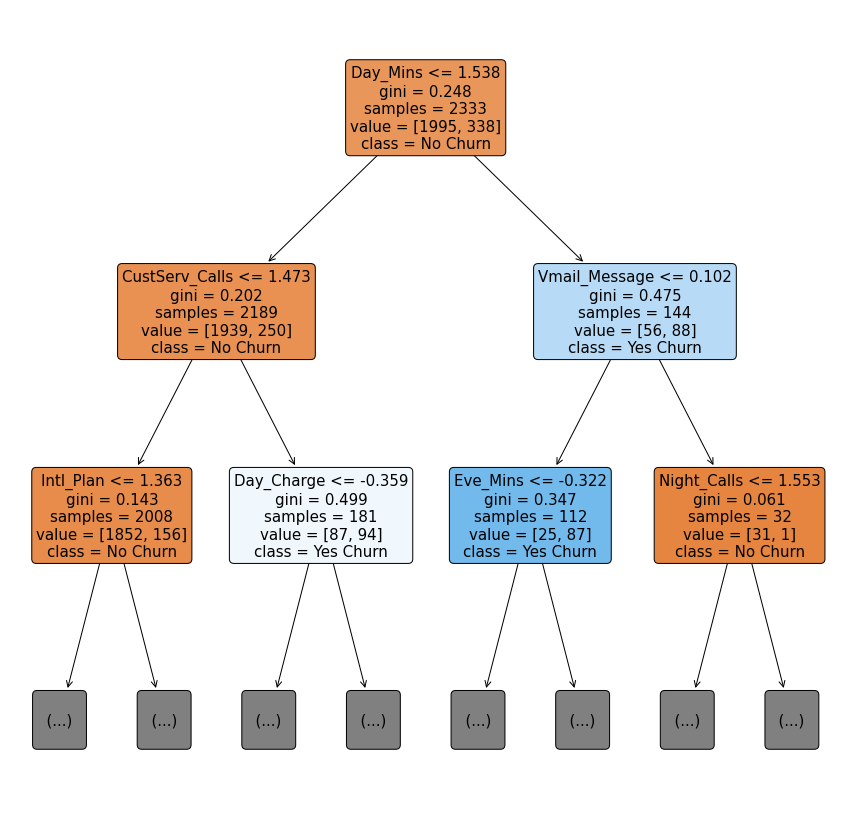

In [12]:
plt.figure(figsize = (15, 15))
plot_tree(model_DT, 
          filled=True,
          rounded=True,
          class_names = ["No Churn", "Yes Churn"],
          feature_names = X.columns,
          max_depth=2, 
          fontsize=15)

plt.show()

#### Model Performance and Confusion Matrix

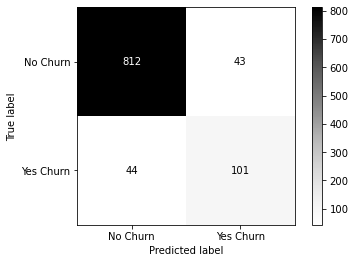

In [13]:
plot_confusion_matrix(model_DT, 
                      X_test, 
                      y_test, 
                      display_labels=["No Churn", "Yes Churn"],
                      cmap='Greys')
plt.show()

**Explanation:** 
- TN= 812,
- FP= 43,
- FN= 44,
- TP=101

#### Prediction and Classification  Report

In [14]:
y_pred_DT = model_DT.predict(X_test)

In [15]:
print('Accuracy: ', accuracy_score(y_test, y_pred_DT))

print(classification_report(y_test, y_pred_DT))

Accuracy:  0.913
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       855
           1       0.70      0.70      0.70       145

    accuracy                           0.91      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.91      0.91      0.91      1000



#### ROC and AUC Curve

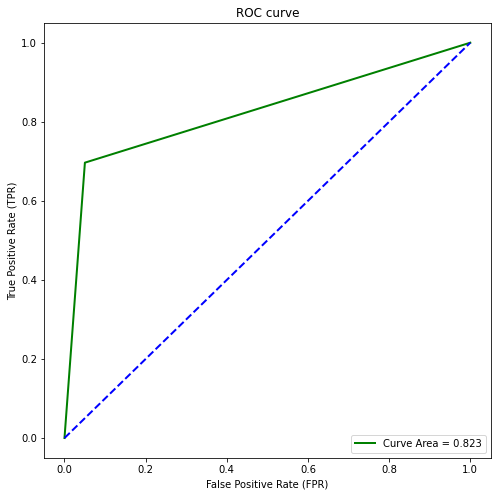

In [16]:
fpr, tpr, thr = roc_curve(y_test, model_DT.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred_DT)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='green', lw=2, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

# [2] Now Hyper Parameter Tuning

#### Grid Search and Cross-Validation with Decision Tree Classifier

In [17]:
# parameters = {'criterion': ['gini','entropy'],
#               'max_features':['auto','sqrt','log2'],
#                'min_samples_leaf':[1],
#               'max_depth': [3, 4, 5, 6, 7,8]}
# model = DecisionTreeClassifier(random_state=42)
# grid_search = GridSearchCV(estimator=model,
#                            param_grid=parameters,
#                            scoring="accuracy",
#                            cv=5,
#                            n_jobs=-1)

# # fit the model with the best hyper-parameters
# grid_result = grid_search.fit(X_train, y_train)

**Explanation:** 
- max_features':['auto','sqrt','log2'],'min_samples_leaf':[1], causes Curve area to be 0.74 ,lower than 0.823( obtained without hyper parameter tuning)


In [18]:
parameters = {'criterion': ['gini','entropy'],
              'max_depth': [3, 4, 5, 6, 7]}

model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5,
                           n_jobs=-1)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(X_train, y_train)

In [19]:
y_pred = np.round(grid_result.predict(X_test), 2)

#### Best hyperparameters in the grid search

In [20]:
grid_result.best_params_

{'criterion': 'entropy', 'max_depth': 6}

#### Sort by Ranking

In [21]:
# cv_result = pd.DataFrame(grid_result.cv_results_)
# cv_result = cv_result[['param_criterion','param_max_features',
#                        'param_max_depth','param_min_samples_leaf',
#                        'split0_test_score','split1_test_score', 
#                        'split2_test_score','split3_test_score',
#                        'split4_test_score', 'mean_test_score', 
#                        'std_test_score','rank_test_score']]
# cv_result = cv_result.sort_values(by='rank_test_score')
# display(cv_result)
# print(cv_result.columns)

In [22]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,param_criterion,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,entropy,6,0.944325,0.925054,0.946467,0.952790,0.920601,0.937847,0.012654,1
4,gini,7,0.940043,0.925054,0.929336,0.954936,0.937768,0.937427,0.010316,2
2,gini,5,0.937901,0.914347,0.946467,0.944206,0.942060,0.936996,0.011672,3
9,entropy,7,0.935760,0.927195,0.946467,0.929185,0.942060,0.936133,0.007352,4
3,gini,6,0.940043,0.925054,0.940043,0.944206,0.924893,0.934848,0.008205,5
7,entropy,5,0.940043,0.912206,0.940043,0.935622,0.937768,0.933136,0.010594,6
1,gini,4,0.907923,0.914347,0.935760,0.916309,0.918455,0.918559,0.009293,7
6,entropy,4,0.907923,0.914347,0.929336,0.916309,0.916309,0.916845,0.006963,8
0,gini,3,0.886510,0.905782,0.920771,0.892704,0.899142,0.900982,0.011798,9
5,entropy,3,0.886510,0.905782,0.907923,0.892704,0.873391,0.893262,0.012747,10


Index(['param_criterion', 'param_max_depth', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


#### Model Performance and Confusion Matrix

In [23]:
#y_pred_DT = model.predict(X_test)

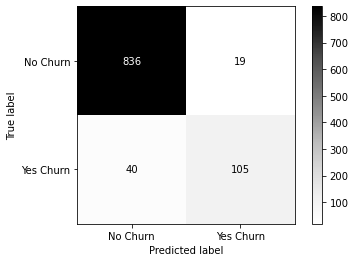

In [24]:
plot_confusion_matrix(grid_result, 
                      X_test, 
                      y_test, 
                      display_labels=["No Churn", "Yes Churn"],
                      cmap='Greys')
plt.show()

**Explanation:** 
- TN= 836,
- FP= 19,
- FN= 40,
- TP=105

In [25]:
# confusion_matrix_dt = confusion_matrix(y_test, y_pred)
# print('confusion_matrix: \n', confusion_matrix_dt)

In [26]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy:  0.941
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       855
           1       0.85      0.72      0.78       145

    accuracy                           0.94      1000
   macro avg       0.90      0.85      0.87      1000
weighted avg       0.94      0.94      0.94      1000



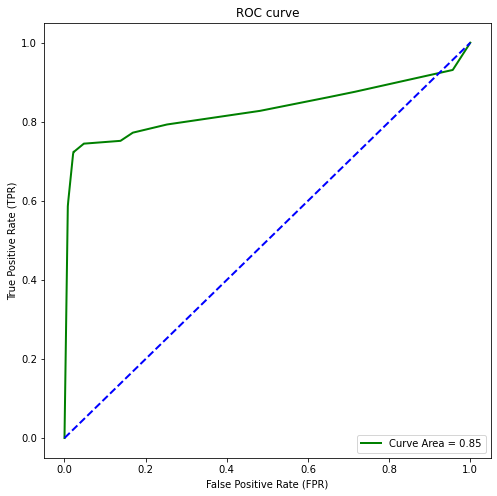

In [27]:
fpr, tpr, thr = roc_curve(y_test, grid_result.predict_proba(X_test)[:,1])
auc = np.round(roc_auc_score(y_test, y_pred), 2)

plt.figure(figsize=(8, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

**Explanation:** 
- produce better Curve Area than without hyperparametr Tuning

# [3] Label encoding,no feature transformation,Decision Tree
## Whethere Feature transformation has any effect on Decision Tree

In [28]:
# Data load
df = pd.read_csv("Churn.csv")
#display(df.head())
display(df.shape)

#droppping 
df = df.drop(['State', 'Area_Code', 'Phone'], axis=1)
#display(df.head())
print(df.shape)

# Encoding
df['Churn'] = df['Churn'].replace(({'no':0, 'yes':1}))
df['Intl_Plan'] = df['Intl_Plan'].replace(({'no':0, 'yes':1}))
df['Vmail_Plan'] = df['Vmail_Plan'].replace(({'no':0, 'yes':1}))

display(df.head())
print(df.shape)
#df.info()

(3333, 21)

(3333, 18)


,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73


(3333, 18)


In [29]:
# variable separation
X = df.drop('Churn', axis=1)
y = df[['Churn']] #Target variable
print(X.shape, y.shape)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,  
                                                    test_size=0.3,  # 70% train data
                                                    random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3333, 17) (3333, 1)
(2333, 17) (1000, 17) (2333, 1) (1000, 1)


#### Decision Tree Without parameter tuning

In [30]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT = model_DT.fit(X_train, y_train)

In [31]:
# plt.figure(figsize = (15, 15))
# plot_tree(model_DT, 
#           filled=True,
#           rounded=True,
#           class_names = ["No Churn", "Yes Churn"],
#           feature_names = X.columns,
#           max_depth=2, 
#           fontsize=15)

# plt.show()

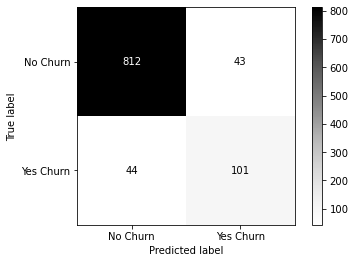

In [32]:
plot_confusion_matrix(model_DT, 
                      X_test, 
                      y_test, 
                      display_labels=["No Churn", "Yes Churn"],
                      cmap='Greys')
plt.show()

In [33]:
y_pred_DT = model_DT.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred_DT))

print(classification_report(y_test, y_pred_DT))

Accuracy:  0.913
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       855
           1       0.70      0.70      0.70       145

    accuracy                           0.91      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.91      0.91      0.91      1000



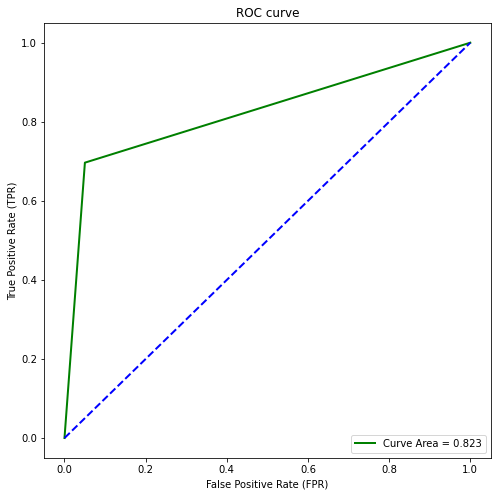

In [34]:
fpr, tpr, thr = roc_curve(y_test, model_DT.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred_DT)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='green', lw=2, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

**Explanation:** 
- Feature Transformation has no effect on Decision Tree 

# [4] One hot encoding, Decision tree

## Encoding-one hot

In [35]:
# Data load
df = pd.read_csv("Churn.csv")
#display(df.head())
display(df.shape)

#droppping 
df = df.drop(['State', 'Area_Code', 'Phone'], axis=1)
#display(df.head())
print(df.shape)

(3333, 21)

(3333, 18)


In [36]:
df= pd.get_dummies(df, columns=['Churn','Intl_Plan','Vmail_Plan'], drop_first=True)

display(df.head())
print(df.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Churn_yes,Intl_Plan_yes,Vmail_Plan_yes
0,128,25,265.1,197.4,244.7,10.0,1,110,45.07,99,16.78,91,11.01,3,2.70,0,0,1
1,107,26,161.6,195.5,254.4,13.7,1,123,27.47,103,16.62,103,11.45,3,3.70,0,0,1
2,137,0,243.4,121.2,162.6,12.2,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,0
3,84,0,299.4,61.9,196.9,6.6,2,71,50.90,88,5.26,89,8.86,7,1.78,0,1,0
4,75,0,166.7,148.3,186.9,10.1,3,113,28.34,122,12.61,121,8.41,3,2.73,0,1,0


(3333, 18)


In [37]:
#df.info()
# df['Churn'].unique()

In [38]:
# variable separation
X = df.drop('Churn_yes', axis=1)
y = df[['Churn_yes']] #Target variable
print(X.shape, y.shape)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,  
                                                    test_size=0.3,  # 70% train data
                                                    random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3333, 17) (3333, 1)
(2333, 17) (1000, 17) (2333, 1) (1000, 1)


#### Decision Tree Without parameter tuning

In [39]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT = model_DT.fit(X_train, y_train)

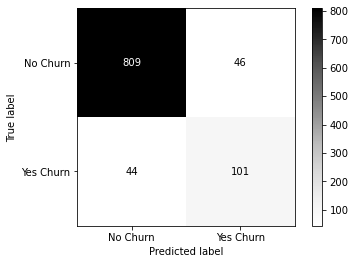

In [40]:
plot_confusion_matrix(model_DT, 
                      X_test, 
                      y_test, 
                      display_labels=["No Churn", "Yes Churn"],
                      cmap='Greys')
plt.show()

In [41]:
y_pred_DT = model_DT.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred_DT))

print(classification_report(y_test, y_pred_DT))

Accuracy:  0.91
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       855
           1       0.69      0.70      0.69       145

    accuracy                           0.91      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.91      0.91      0.91      1000



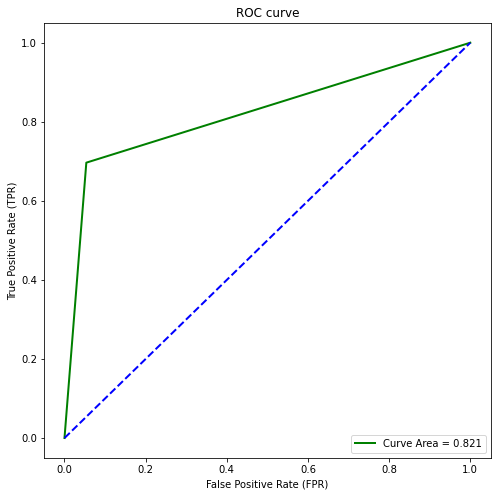

In [42]:
fpr, tpr, thr = roc_curve(y_test, model_DT.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred_DT)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='green', lw=2, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

**Explanation:** 
- Label encoding and standard scaler feature transformation  **Accuracy:  0.913, Curve area 0.823**
- Label encoding and standard scaler(grid search and CV )  **Accuracy:  0.941, Curve area 0.85**
- Label encoding and no feature transformation **Accuracy:  0.913, Curve area 0.823**       
- One hot encoding and no feature transformation **Accuracy:  0.91, Curve area 0.821**    